# Исследование данных о продажах игр, оценок пользователей и экспертов, жанров и платформ

Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). В этом проекте я буду искать определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

**Цель - проверить две гипотезы:**
1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
2. Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

## Оглавление:
* [Общая информация](#1)
* [Предобработка данных](#2)
* [Исследовательский анализ](#3)
* [Портрет пользователя каждого региона](#4)
* [Гипотезы](#5)
* [Общий итог](#6)

## Общая информация<a class="anchor" id="1"></a>
### Импортируем библиотеки и ознакомимся с датасетом.

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
import numpy as np

In [2]:
def func(platform_):
    df_platform_sales = df.loc[df['platform'] == platform_]


    df_platform_sales.plot(x='critic_score', y='total_sales', kind='scatter', title='Диаграмма рассеяния, "PS4"', grid=True)
    print('Корреляция продаж относительно оценок равна', 
          round(df_platform_sales['critic_score'].corr(df_platform_sales['total_sales']), 2))

In [3]:
def func2(genre_):
    print('')
    print('Статистика по жанру', genre_)
    print(df.loc[df['genre'] == genre_, 'global_sales'].describe())

In [4]:
df = pd.read_csv(r'C:\Users\JesusChristosovitch\Desktop\Project\Project2\games.csv')

display(df.head(15))
df.info()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


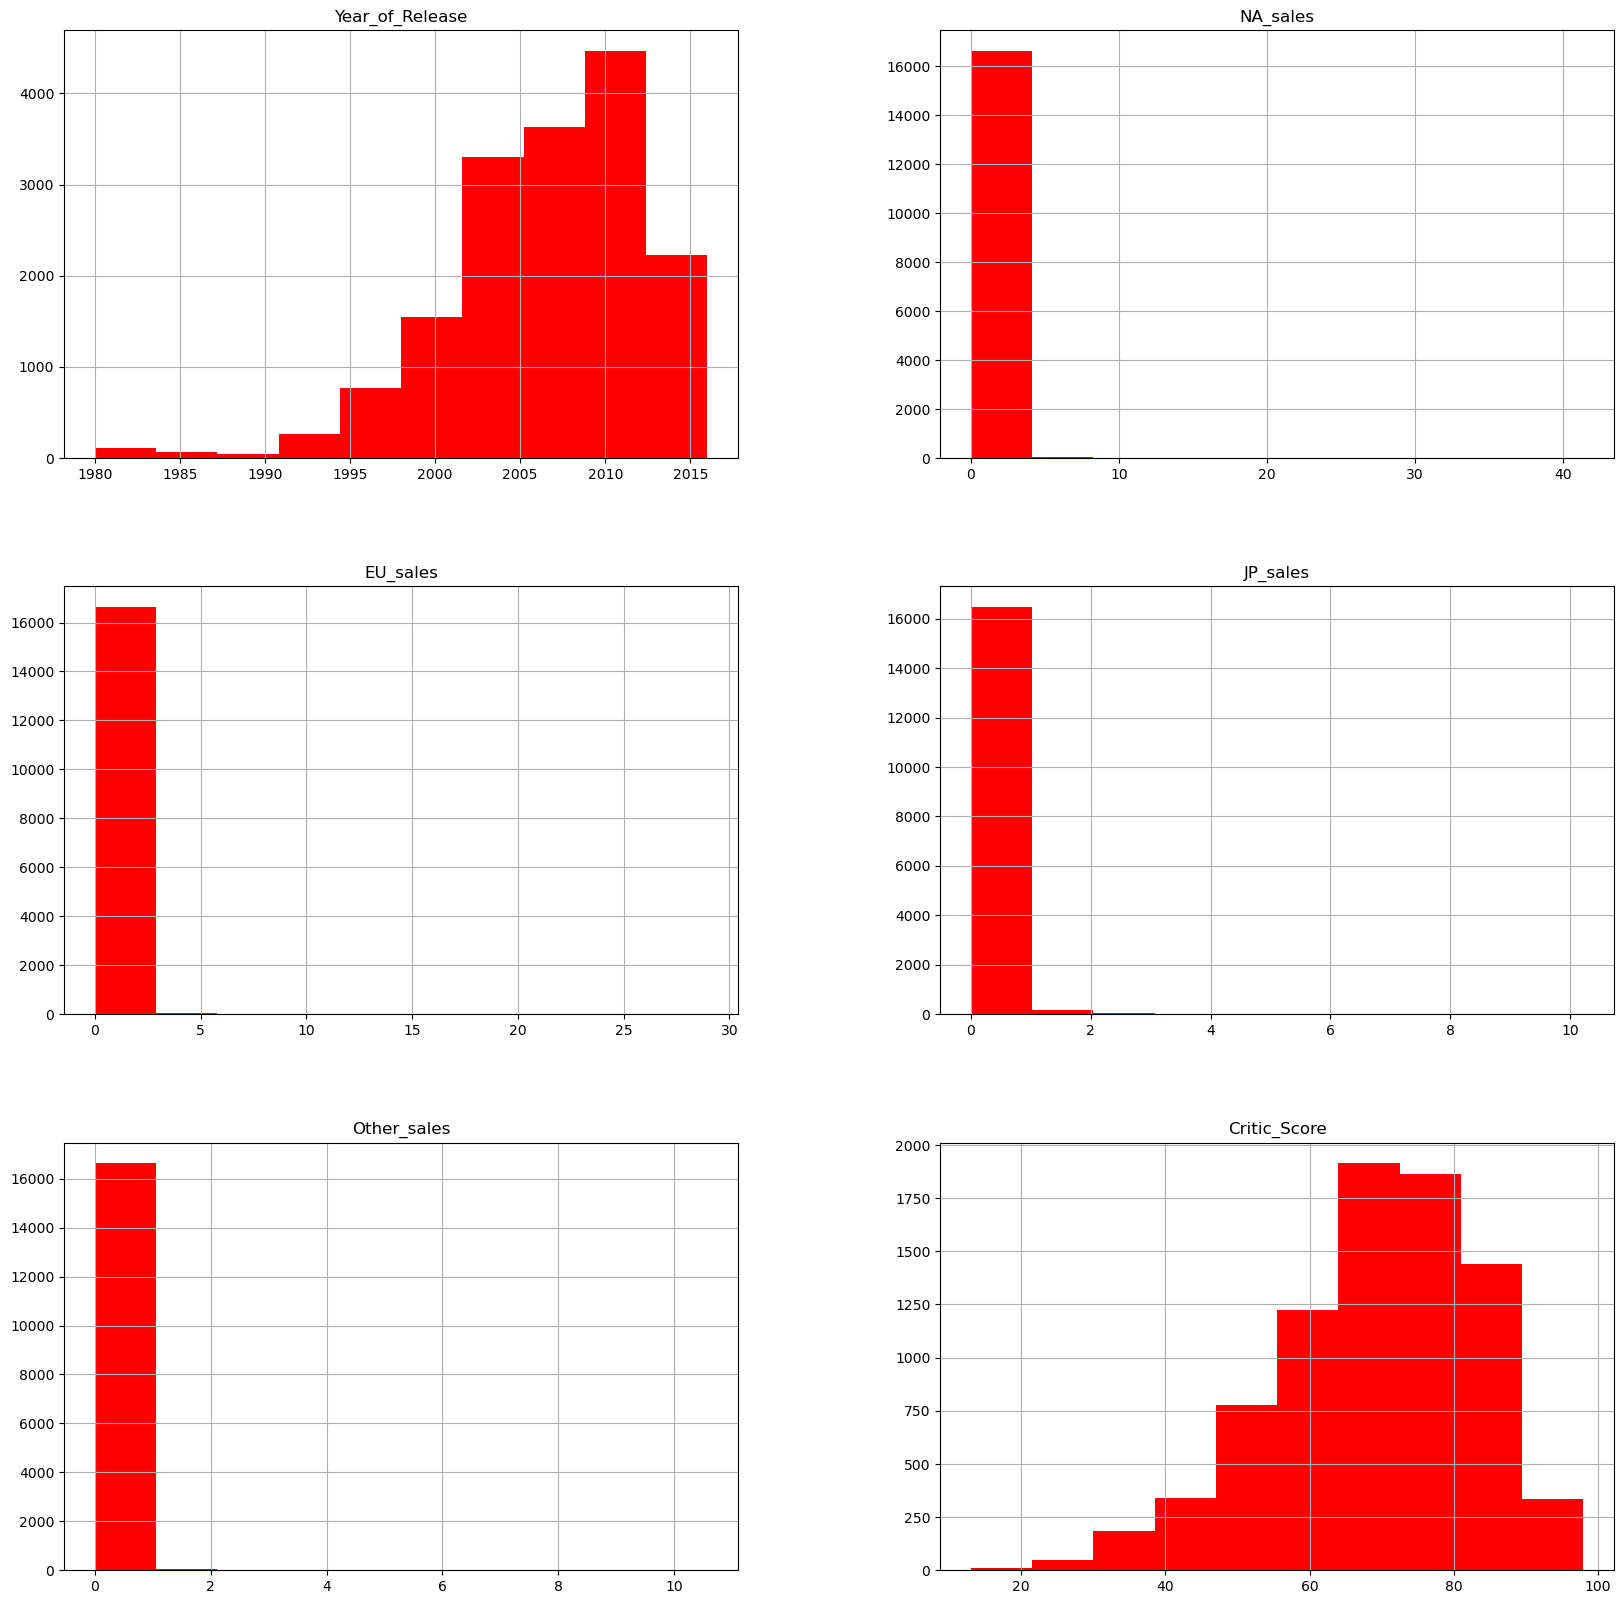

In [5]:
df.hist(color='red', figsize=(20,20), grid=True)
plt.show()

**По графикам выше мы можем сделать следующие выводы:**
- большая часть игры была выпущена в 2009-2012 года
- подавляющее большнство игр было продано в Северной Америке тиражом до 5 миллионов копий
- подавляющее большнство игр было продано в Европе тиражом до 3 миллионов копий
- подавляющее большнство игр было продано в Японии тиражом до 1 миллиона копий
- подавляющее большнство игр в остальных странах было продано тиражом до 0.5 миллиона копий
- оценка критиков в среднем колеблется от 64 до 80


## Предобработка данных <a class="anchor" id="2"></a>

### На этом этапе я заполню пропущенные значения, а также добавлю новые столбцы.

**Приведём названия столбцов к нижнему регистру.**

In [6]:
df.columns = map(str.lower, df.columns)
# data.columns = data.columns.str.lower() - альтернатива

In [7]:
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

**Выведем количество пропущенных значений для каждого столбца.**

In [8]:
print(df.isna().sum())

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64


**Заполним пропуски в столбце `name` значением `unknown`.**

In [9]:
df['name'] = df['name'].fillna('unknown')

**Пропуски в стоблце `year_of_release` могут появиться из-за того, что год выпуска игры не был указан.**

**Заполним пропуски в столбце `genre` значением "Other".**

In [10]:
df['genre'] = df['genre'].fillna('Other')

**Видим строку `tbd` среди оценок пользователей. `tbd` (to be determined) - значение предстоит определить. Заменим его на `nan`. Приведём столбец `user_score` к `float`.**

In [11]:
df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [12]:
df['user_score'] = df['user_score'].replace('tbd', np.nan).astype('float')

**Пропуски в столбце `critic_score` и `user_score` не будем заменять, так как каждый объект слишком уникален.**

**Они могут быть обусловлены отсутствием оценок и отзывов на конкретные игры.**

**Пропуски в столбце `rating` заменим на `unknown`.**

In [13]:
df['rating'] = df['rating'].fillna('unknown')

**Добавим столбец с суммарными продажами во всех регионах.**

In [14]:
df['total_sales'] = df[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)

## Исследовательский анализ  <a class="anchor" id="3"></a>
### Проведу исследовательский анализ данных.

#### **Посмотрим, сколько игр было выпущено в разные годы.**

In [15]:
df_grouped_year = df.groupby('year_of_release')['name'].count()
print(df_grouped_year)

year_of_release
1980.0       9
1981.0      46
1982.0      36
1983.0      17
1984.0      14
1985.0      14
1986.0      21
1987.0      16
1988.0      15
1989.0      17
1990.0      16
1991.0      41
1992.0      43
1993.0      62
1994.0     121
1995.0     219
1996.0     263
1997.0     289
1998.0     379
1999.0     338
2000.0     350
2001.0     482
2002.0     829
2003.0     775
2004.0     762
2005.0     939
2006.0    1006
2007.0    1197
2008.0    1427
2009.0    1426
2010.0    1255
2011.0    1136
2012.0     653
2013.0     544
2014.0     581
2015.0     606
2016.0     502
Name: name, dtype: int64


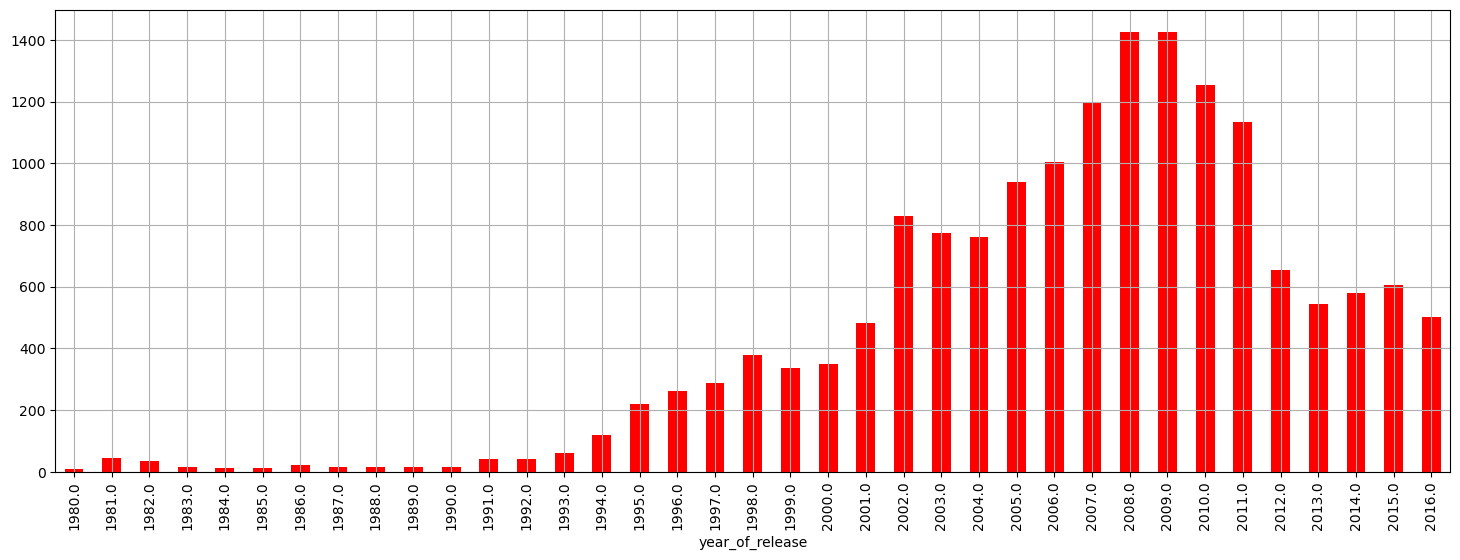

In [16]:
df_grouped_year.plot(kind='bar', color='red', figsize=(18,6), grid=True)
plt.show()

Возьмём выборку за последние десять лет, с 2006 по 2016, так как за эти десять лет были как взлёты по продажам, так и падения.

#### **Платформы с наибольшими суммарными продажами.**

In [17]:
df_grouped_platform = df.groupby('platform')['total_sales'].sum()
df_grouped_platform.sort_values(ascending=False).head(18)

platform
PS2     1255.77
X360     971.42
PS3      939.65
Wii      907.51
DS       806.12
PS       730.86
GBA      317.85
PS4      314.14
PSP      294.05
PC       259.52
3DS      259.00
XB       257.74
GB       255.46
NES      251.05
N64      218.68
SNES     200.04
GC       198.93
XOne     159.32
Name: total_sales, dtype: float64

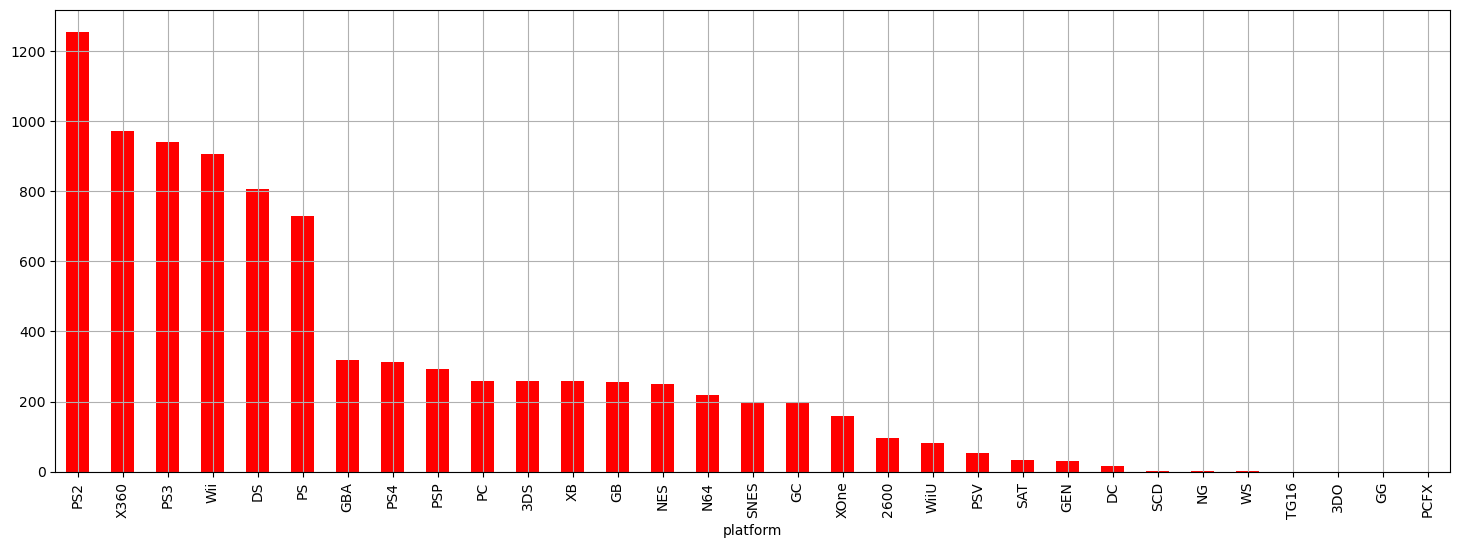

In [18]:
df_grouped_platform.sort_values(ascending=False).plot(kind='bar', color='red', figsize=(18,6), grid=True)
plt.show()

In [19]:
top_10 = df_grouped_platform.head(10).sort_values(ascending=False).index.tolist()
print(top_10)

['DS', 'GBA', '3DS', 'GB', 'GC', '2600', 'GEN', 'DC', '3DO', 'GG']


В топ-10 платформ с наибольшими суммарными продажами входят `DS`, `GBA`, `3DS`, `GB`, `GC`, `2600`, `GEN`, `DC`, `3DO` и `GG`.

**Распределение платформ по годам.**

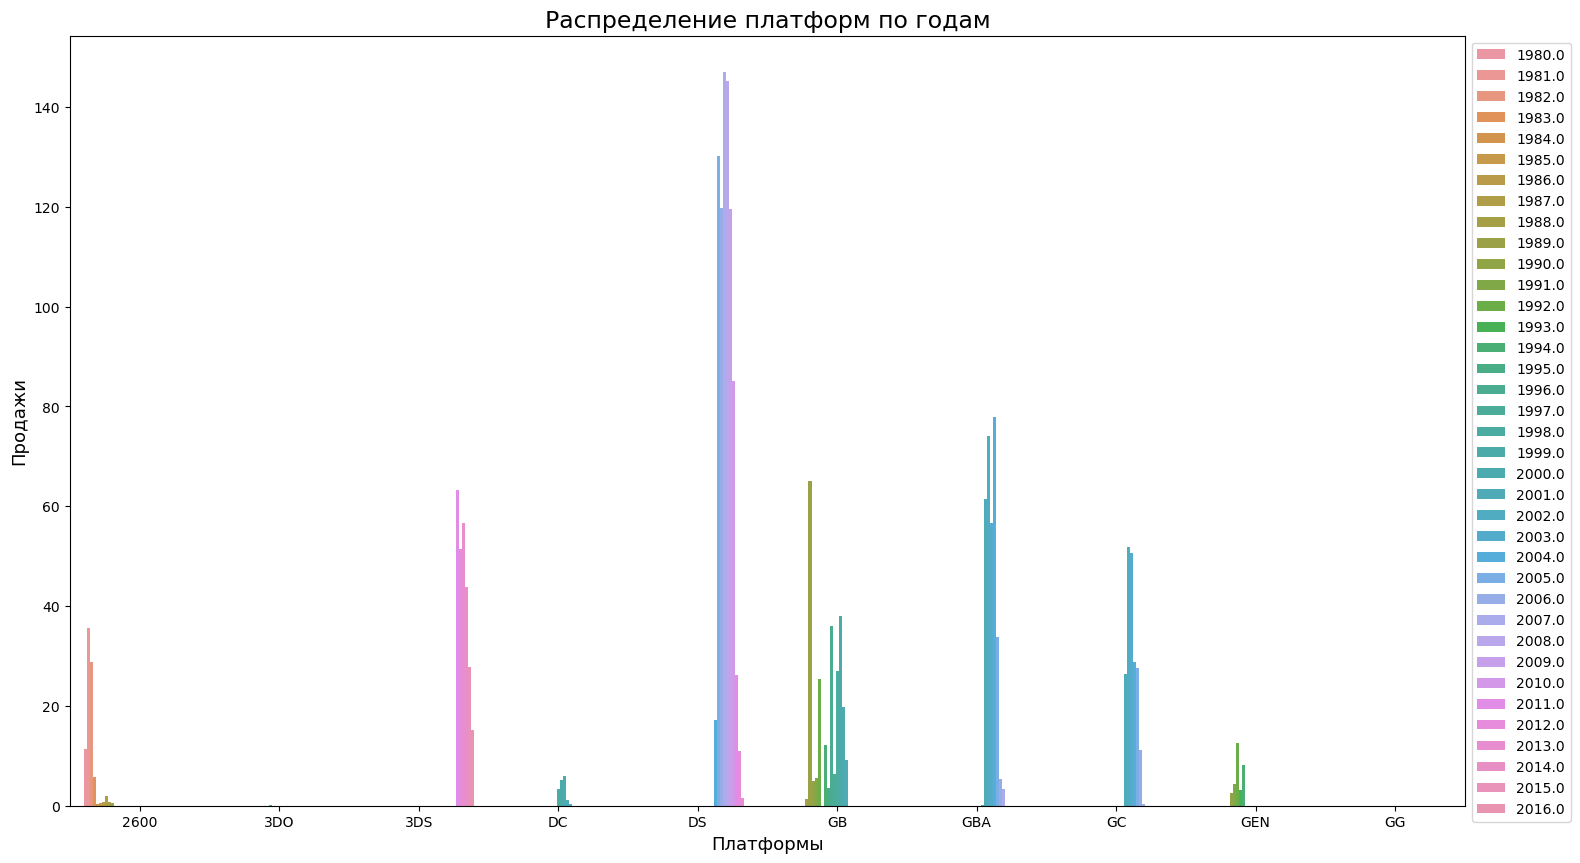

In [20]:
df_top_sales = df.query('platform in @top_10').groupby(['platform', 'year_of_release'], as_index=False)['total_sales'].sum()

plt.figure(figsize=(18, 10))
sns.barplot(data=df_top_sales, x='platform', y='total_sales', hue='year_of_release')

plt.legend(bbox_to_anchor=(1, 1), loc=2)
plt.title('Распределение платформ по годам', size=17)
plt.xlabel('Платформы', size=13)
plt.ylabel('Продажи', size=13)

plt.show()

В среднем платформы меняются раз в `8 лет`.

Актуальными можно считать данные, которым меньше `3 лет`. Уберём ненужные строки.

In [21]:
df = df.query('year_of_release > 2013')

#### График лидеров продаж среди платформ.

,platform,year_of_release,total_sales
11,PS4,2016.0,69.25
28,XOne,2016.0,26.15
2,3DS,2016.0,15.14
5,PC,2016.0,5.25
22,WiiU,2016.0,4.60
16,PSV,2016.0,4.25
8,PS3,2016.0,3.60
25,X360,2016.0,1.52
19,Wii,2016.0,0.18


['PS4', 'XOne', '3DS', 'PC', 'WiiU']

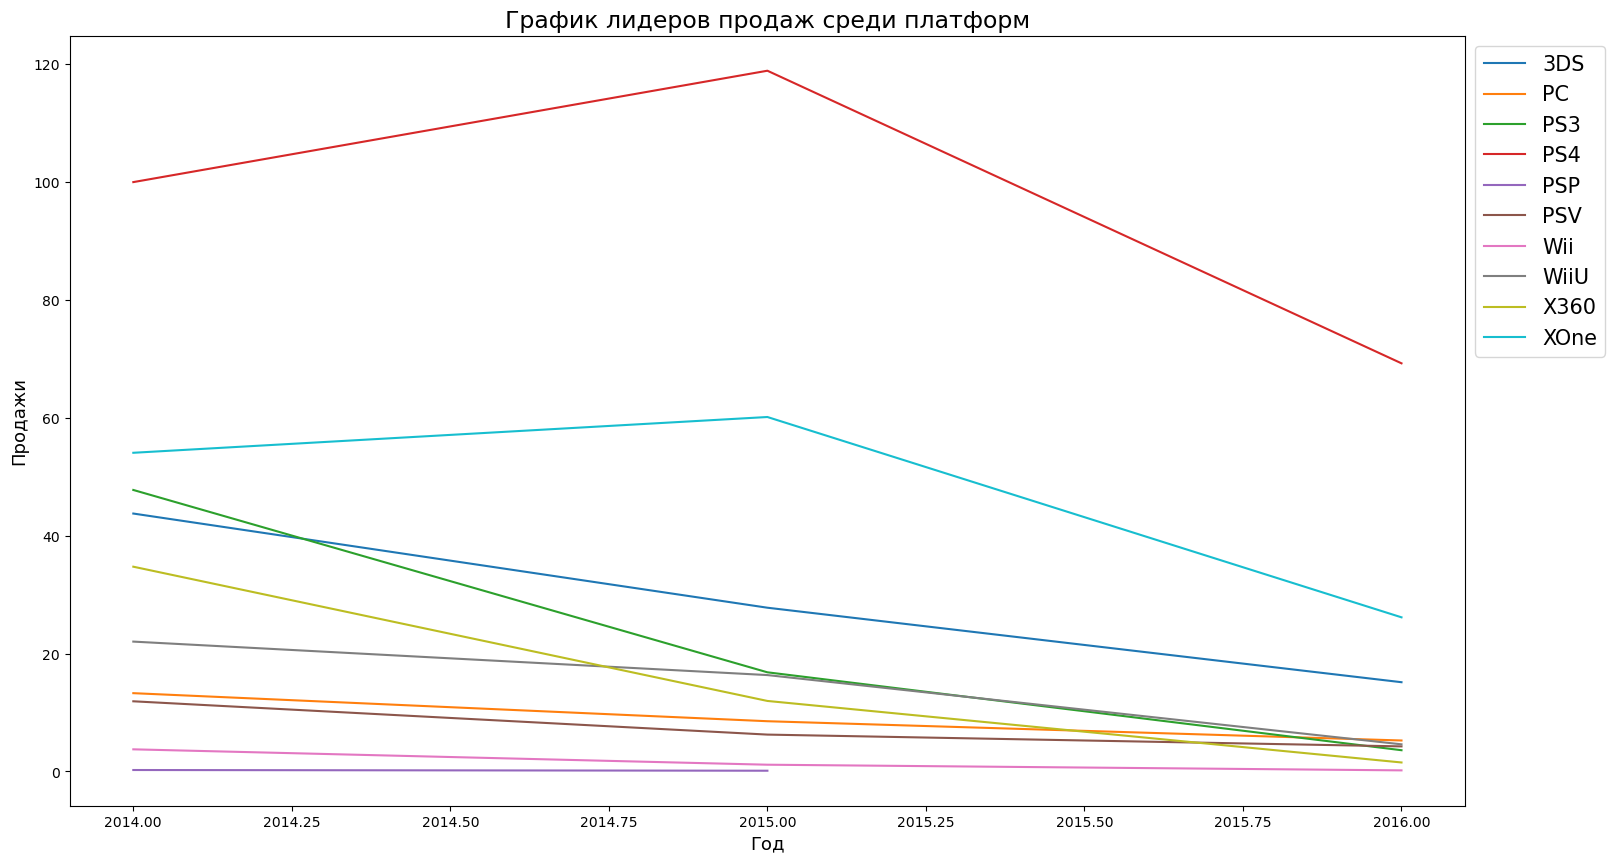

In [22]:
plot_df = df.groupby(['platform','year_of_release'], as_index=False)['total_sales'].sum()

top_platform = plot_df.query('year_of_release == 2016').sort_values(by='total_sales', ascending=False)
top_platform_list = top_platform['platform'].head(5).tolist()

display(top_platform)
display(top_platform_list)

plt.figure(figsize=(18, 10))
sns.lineplot(data=plot_df, x='year_of_release', y='total_sales', hue='platform')

plt.legend(bbox_to_anchor=(1, 1), loc=2, fontsize=15)
plt.title('График лидеров продаж среди платформ', size=17)
plt.xlabel('Год', size=13)
plt.ylabel('Продажи', size=13)

plt.show()

Продажи практически всех компаний падают на протяжении последнего года. Самой крупной компанией ялвяется PS4.

Видим, что на момент 2016 года пятью самыми перспективными являются `PS4`, `XOne`, `3DS`, `PC` и `WiiU`.

#### **Построим диаграмму разброса по глобальным продажам игр в разбивке по платформам.**

In [23]:
df['global_sales'] = df['total_sales'] - df['other_sales']
games_sales = df.groupby(['name', 'platform'], as_index=False)['global_sales'].sum()

In [24]:
list_platform = games_sales
list_platform = list_platform['platform']

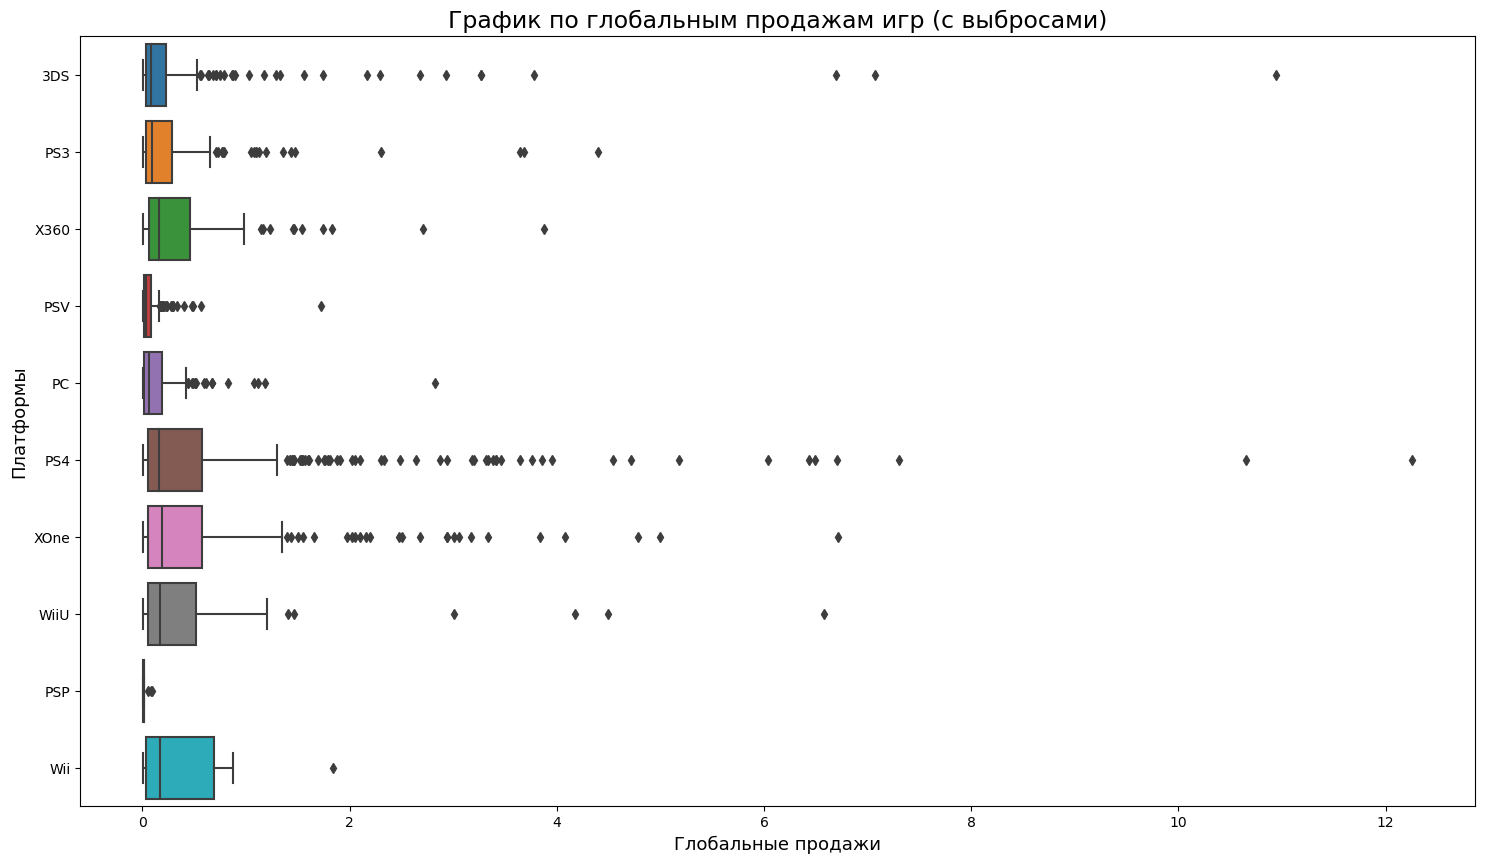

In [25]:
plt.figure(figsize=(18, 10))
sns.boxplot(data=games_sales, x='global_sales', y=list_platform)

plt.title('График по глобальным продажам игр (с выбросами)', size=17)
plt.xlabel('Глобальные продажи', size=13)
plt.ylabel('Платформы', size=13)
plt.show()

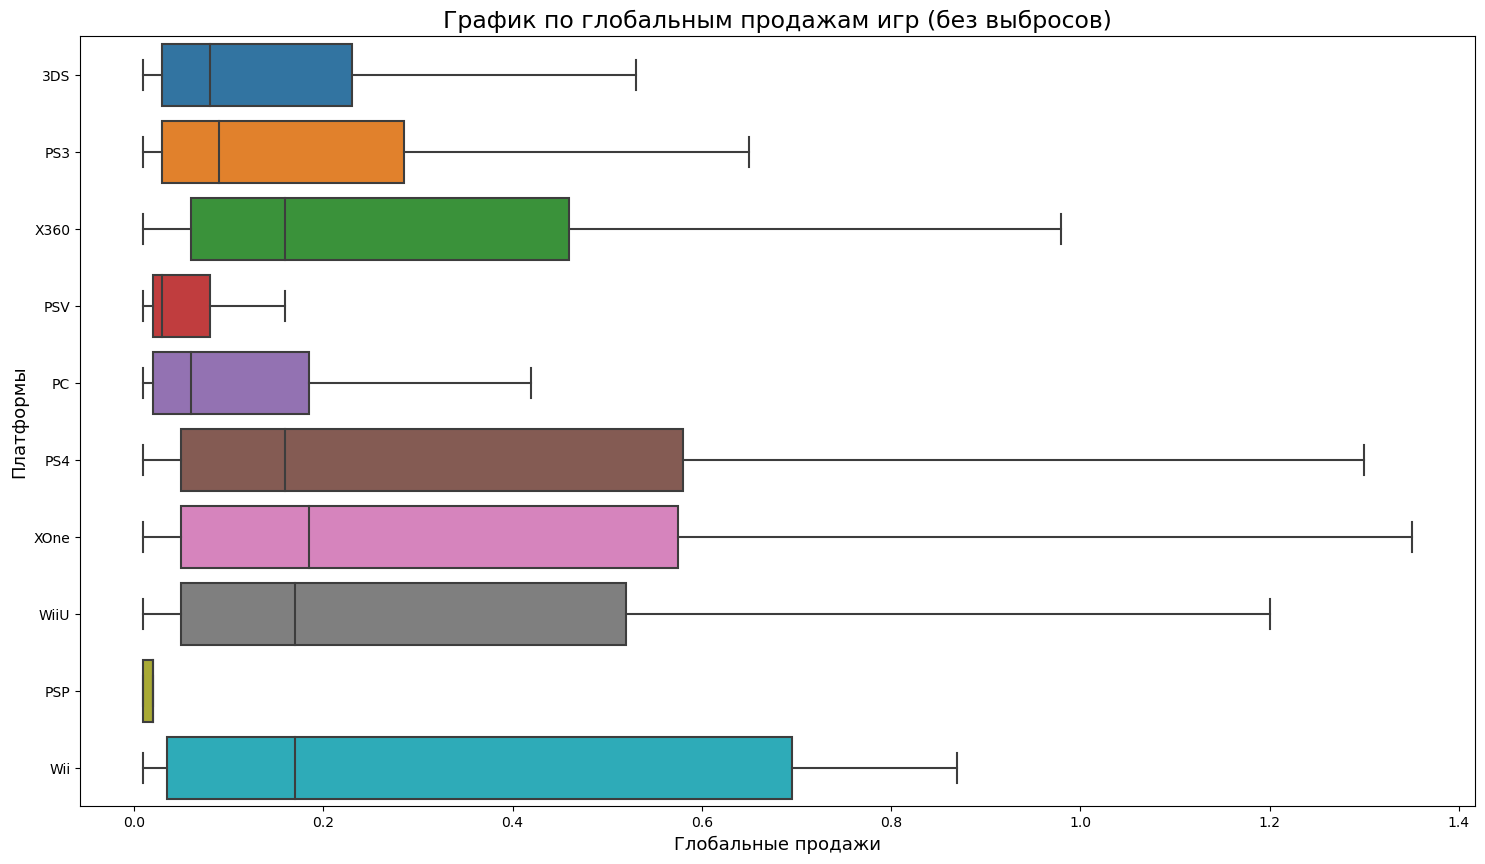

In [26]:
plt.figure(figsize=(18, 10))
sns.boxplot(data=games_sales, x='global_sales', y=list_platform, showfliers=False)

plt.title('График по глобальным продажам игр (без выбросов)', size=17)
plt.xlabel('Глобальные продажи', size=13)
plt.ylabel('Платформы', size=13)
plt.show()

По первому графику мы видим большое количество выбросов, особенно на следующих платформах: `PS4`, `3DS`, `XOne`, `WiiU` и `PS3`. 

По второму графику мы видим, что медианы всех продаж платформ находятся ближе к первому квартилю.
Платформой с самой большой медианой является XOne.

#### **Влияние отзывов пользователей и критиков на продажи внутри одной популярной платформы.**

**Диаграмма рассеяния для зависимости всех продаж от оценок критиков.**

Корреляция продаж относительно оценок равна 0.33


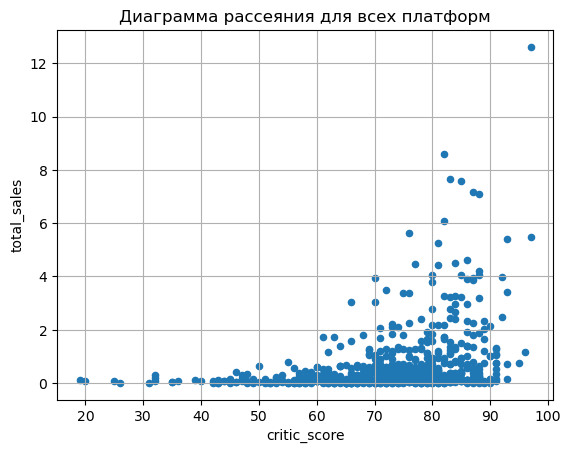

In [27]:
df.plot(x='critic_score', y='total_sales', kind='scatter', title='Диаграмма рассеяния для всех платформ', grid=True)

print('Корреляция продаж относительно оценок равна', round(df['critic_score'].corr(df['total_sales']), 2))

Корреляция отзывов критиков и суммарных продаж равна 0.33, что говорит нам о слабой линейной связи. Не факт, что с ростом оценок вырастут суммарные продажи во всех регионах.

**Диаграмма рассеяния для зависимости продаж на платформе `PS4` от оценок критиков.**

Корреляция продаж относительно оценок равна 0.4


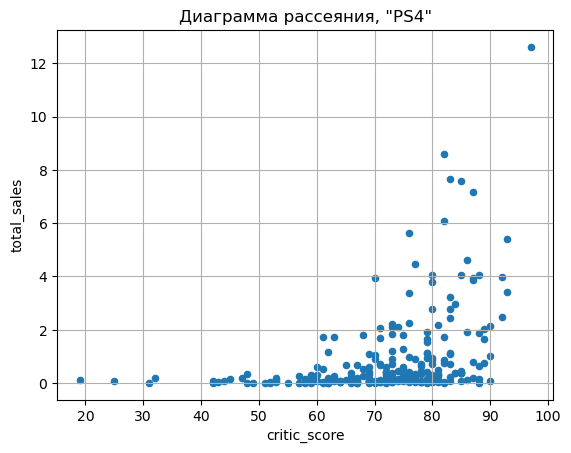

In [28]:
func('PS4')

**Диаграмма рассеяния для зависимости продаж на платформе `3DS` от оценок критиков.**

Корреляция продаж относительно оценок равна 0.31


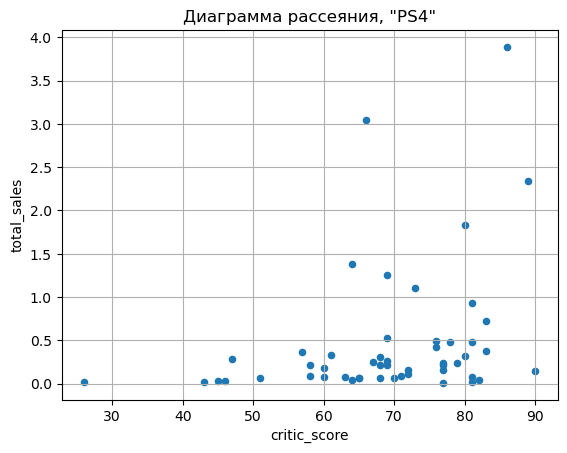

In [29]:
func('3DS')

**Диаграмма рассеяния для зависимости продаж на платформе `XOne` от оценок критиков.**

Корреляция продаж относительно оценок равна 0.43


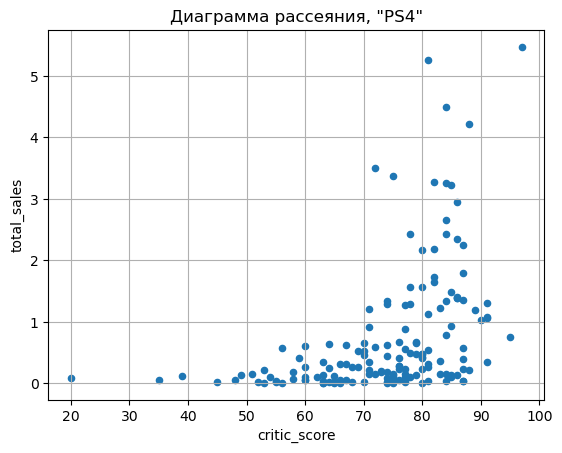

In [30]:
func('XOne')

**Диаграмма рассеяния для зависимости продаж на платформе `WiiU` от оценок критиков.**

Корреляция продаж относительно оценок равна 0.37


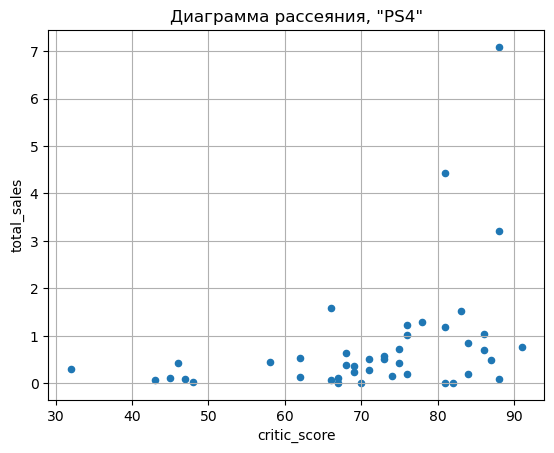

In [31]:
func('WiiU')

**Диаграмма рассеяния для зависимости продаж на платформе `PS3` от оценок критиков.**

Корреляция продаж относительно оценок равна 0.45


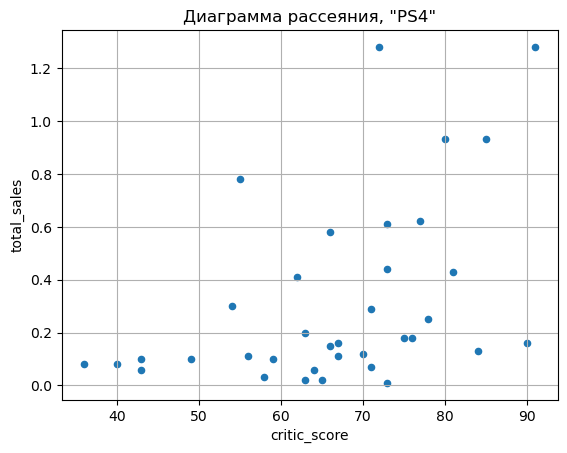

In [32]:
func('PS3')

**Подсчитав корреляцию для каждой крупной платформы мы можем сделать вывод, что на всех этих плафтормах слабо выражена зависимость между продажами и оценками критиками. Корреляции на этих платформах варьируются от 0.3 до 0.4.**

#### **Общее распределение игр по жанрам**

In [33]:
df_grouped_genre = df.groupby('genre')['global_sales'].sum().sort_values(ascending=False)
print('Список жанров, отсортированный по продажам')
print('')
print(df_grouped_genre)

print()
genre_list = df_grouped_genre.index.tolist()

for i in genre_list:
    func2(i)

Список жанров, отсортированный по продажам

genre
Action          176.79
Shooter         149.41
Sports           95.12
Role-Playing     92.80
Misc             33.52
Fighting         25.49
Racing           24.63
Platform         16.28
Adventure        15.73
Simulation       12.24
Strategy          3.72
Puzzle            2.10
Name: global_sales, dtype: float64


Статистика по жанру Action
count    619.000000
mean       0.285606
std        0.687126
min        0.010000
25%        0.030000
50%        0.080000
75%        0.250000
max       10.650000
Name: global_sales, dtype: float64

Статистика по жанру Shooter
count    128.000000
mean       1.167266
std        1.759188
min        0.010000
25%        0.155000
50%        0.475000
75%        1.377500
max       12.250000
Name: global_sales, dtype: float64

Статистика по жанру Sports
count    161.000000
mean       0.590807
std        1.062761
min        0.010000
25%        0.050000
50%        0.170000
75%        0.580000
max        7.300000
Nam

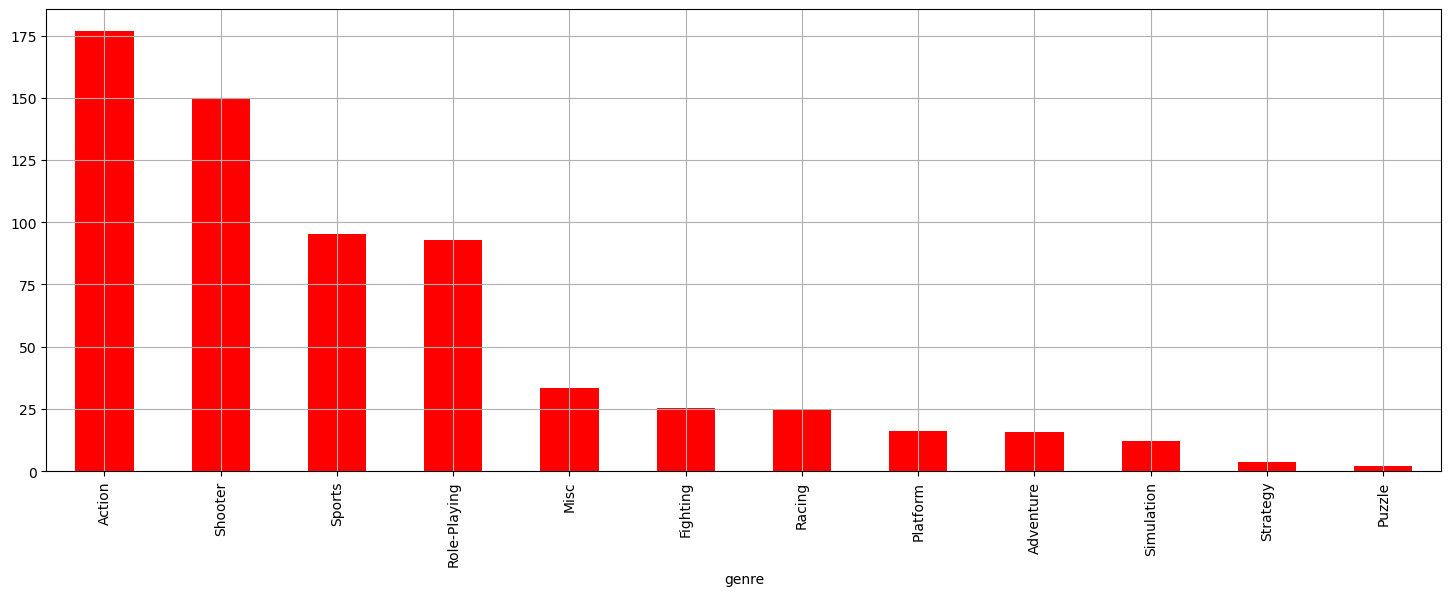

In [34]:
df_grouped_genre.plot(kind='bar', color='red', figsize=(18,6), grid=True)
plt.show()

In [35]:
df_grouped_genre.describe()

count     12.000000
mean      53.985833
std       59.790976
min        2.100000
25%       14.857500
50%       25.060000
75%       93.380000
max      176.790000
Name: global_sales, dtype: float64

Самыми крупным жанром с точки зрения суммы продаж игр является `Action`, но самым прибыльным является `Shooter`, так как его среднее равно 1.17, а медиана равна 0.48. Самым малочисленным жанром с точки зрения продаж является `Adventure`, его среднее равно 0.18, а медиана равна 0.03.


## Портрет пользователя каждого региона <a class="anchor" id="4"></a>

### Для составления портрета пользователя визуализируем данные.

**Круговые диаграммы долей продаж в разных странах**

,na_sales,sum
platform,,
3DS,0.106792,22.64
PC,0.047881,7.23
PS3,0.100685,22.05
PS4,0.262261,98.61
PSP,0.000000,0.00
PSV,0.008542,2.52
Wii,0.189091,2.08
WiiU,0.265205,19.36
X360,0.254955,28.30


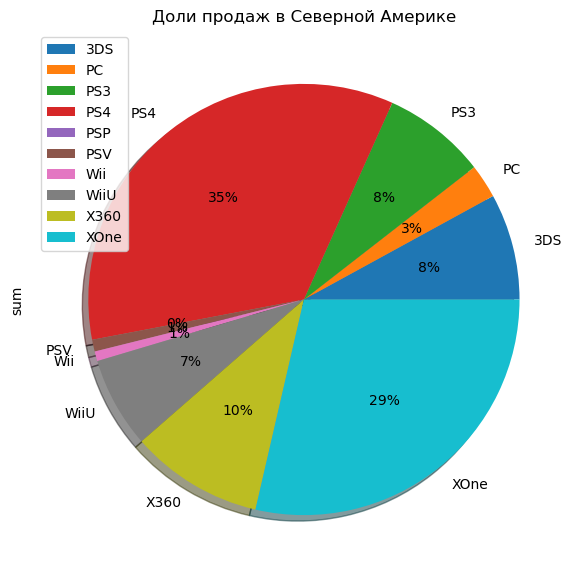

In [36]:
na_sales_platform = df.pivot_table(index='platform', values='na_sales')
na_sales_platform['sum'] = df.groupby('platform')['na_sales'].sum()
display(na_sales_platform)

na_sales_platform.plot(kind='pie', y='sum', autopct='%1.0f%%', title='Доли продаж в Северной Америке', 
                       figsize=(7,7), shadow=True)
plt.show()

На рынке Северной Америки преобладают PS4 и XOne. Их доли 35% и 29% соответственно.  

,eu_sales,sum
platform,,
3DS,0.076038,16.12
PC,0.119007,17.97
PS3,0.116621,25.54
PS4,0.345851,130.04
PSP,0.000000,0.00
PSV,0.011966,3.53
Wii,0.235455,2.59
WiiU,0.180137,13.15
X360,0.139550,15.49


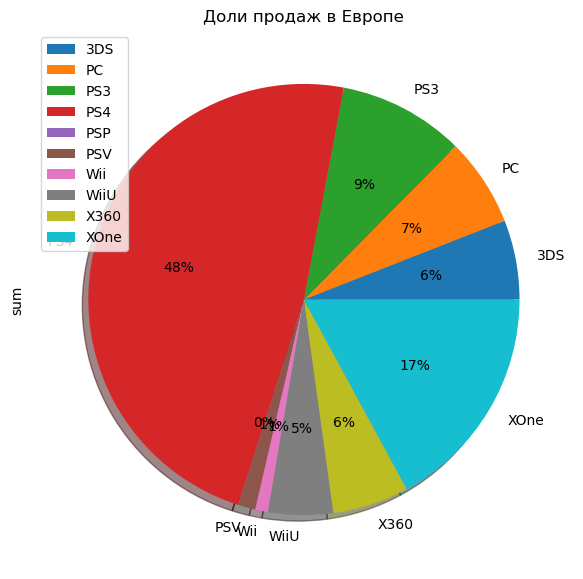

In [37]:
eu_sales_platform = df.pivot_table(index='platform', values='eu_sales')
eu_sales_platform['sum'] = df.groupby('platform')['eu_sales'].sum()
display(eu_sales_platform)

eu_sales_platform.plot(kind='pie', y='sum', autopct='%1.0f%%', title='Доли продаж в Европе', 
                       figsize=(7,7), shadow=True)
plt.show()

На рынке Европы преобладает PS4, занимая 48% рынка. Второй платформой по продажам также является XOne, но уже с 17%.

,jp_sales,sum
platform,,
3DS,0.208679,44.24
PC,0.000000,0.00
PS3,0.051233,11.22
PS4,0.039947,15.02
PSP,0.027692,0.36
PSV,0.049288,14.54
Wii,0.000000,0.00
WiiU,0.100137,7.31
X360,0.000721,0.08


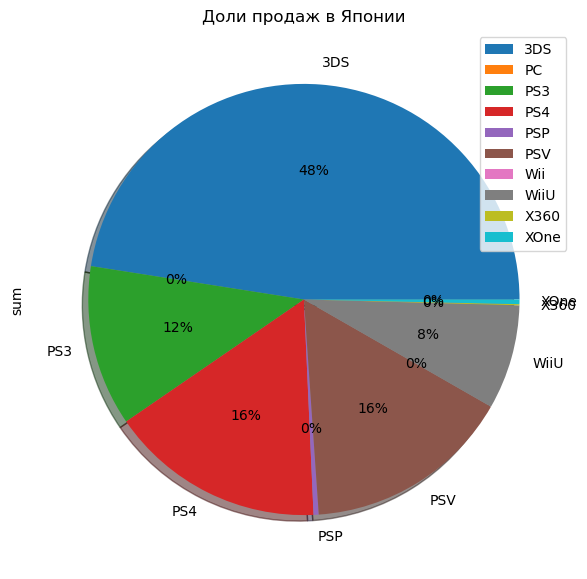

In [38]:
jp_sales_platform = df.pivot_table(index='platform', values='jp_sales')
jp_sales_platform['sum'] = df.groupby('platform')['jp_sales'].sum()
display(jp_sales_platform)

jp_sales_platform.plot(kind='pie', y='sum', autopct='%1.0f%%', title='Доли продаж в Японии', 
                       figsize=(7,7), shadow=True)
plt.show()

На рынке Японии преобладают 3DS, занимая 48% рынка. PS4 и PSV идут после 3DS с долями по 16% каждая.

,other_sales,sum
platform,,
3DS,0.017358,3.68
PC,0.012252,1.85
PS3,0.042785,9.37
PS4,0.118298,44.48
PSP,0.000000,0.00
PSV,0.006136,1.81
Wii,0.036364,0.40
WiiU,0.043288,3.16
X360,0.039189,4.35


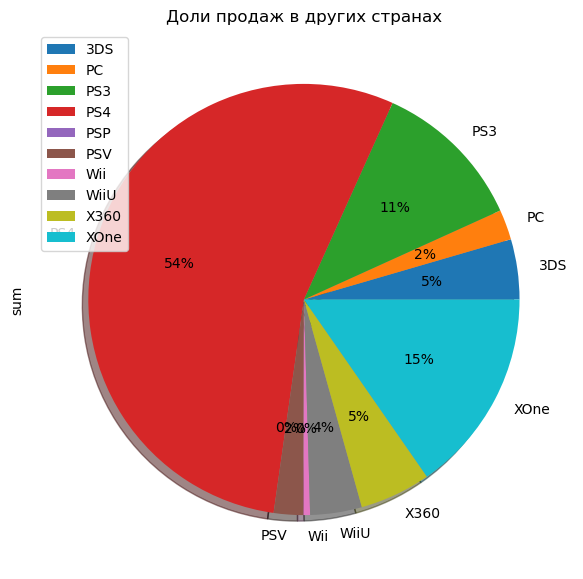

In [39]:
other_sales_platform = df.pivot_table(index='platform', values='other_sales')
other_sales_platform['sum'] = df.groupby('platform')['other_sales'].sum()
display(other_sales_platform)

other_sales_platform.plot(kind='pie', y='sum', autopct='%1.0f%%', title='Доли продаж в других странах', 
                       figsize=(7,7), shadow=True)
plt.show()

В остальных странах преобладают PS4, занимая 54% рынка. XOne и PS3 идут после PS4 с долями 15% и 11% соответственно.

**Круговые диаграммы популярности жанров в разных странах**

,na_sales,sum
genre,,
Action,0.117173,72.53
Adventure,0.030486,5.64
Fighting,0.207167,12.43
Misc,0.133186,15.05
Platform,0.178684,6.79
Puzzle,0.046429,0.65
Racing,0.126667,8.74
Role-Playing,0.151448,33.47
Shooter,0.617344,79.02


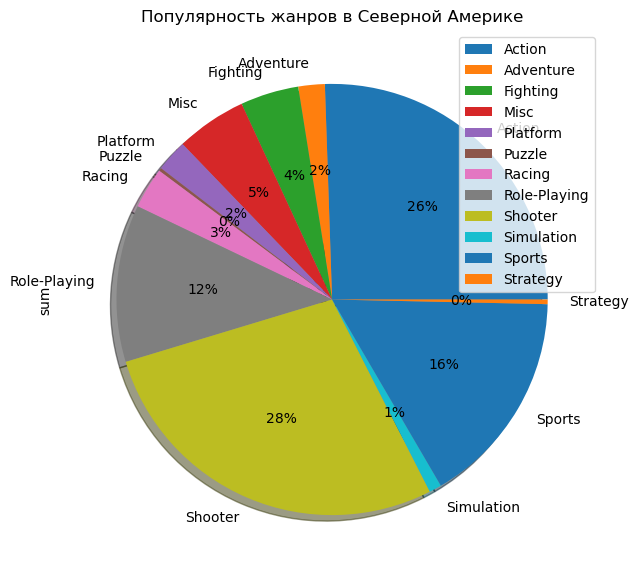

In [40]:
na_sales_genre = df.pivot_table(index='genre', values='na_sales')
na_sales_genre['sum'] = df.groupby('genre')['na_sales'].sum()
display(na_sales_genre)

na_sales_genre.plot(kind='pie', y='sum', autopct='%1.0f%%', title='Популярность жанров в Северной Америке', 
                       figsize=(7,7), shadow=True)
plt.show()

Самыми популярными жанрами в Северной Америке являются шутеры, экшн, спортивные игры и ролевые игры.

,eu_sales,sum
genre,,
Action,0.120646,74.68
Adventure,0.035081,6.49
Fighting,0.111500,6.69
Misc,0.113805,12.86
Platform,0.178947,6.80
Puzzle,0.037143,0.52
Racing,0.204783,14.13
Role-Playing,0.127466,28.17
Shooter,0.511875,65.52


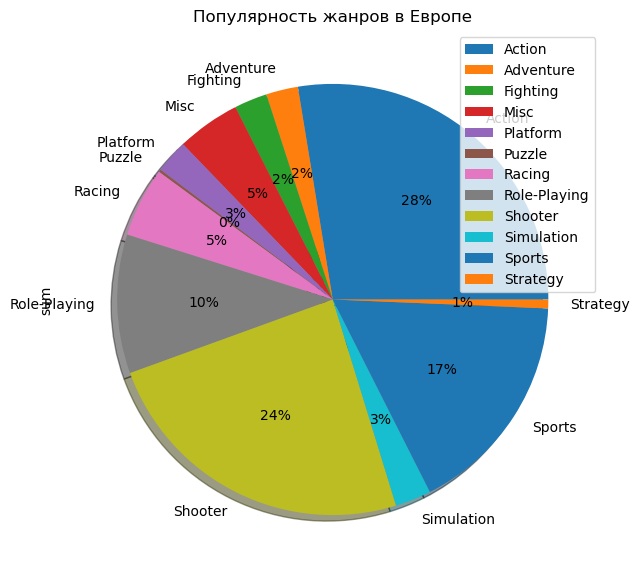

In [41]:
eu_sales_genre = df.pivot_table(index='genre', values='eu_sales')
eu_sales_genre['sum'] = df.groupby('genre')['eu_sales'].sum()
display(eu_sales_genre)

eu_sales_genre.plot(kind='pie', y='sum', autopct='%1.0f%%', title='Популярность жанров в Европе', 
                       figsize=(7,7), shadow=True)
plt.show()

Самыми популярными жанрами в Европе являются экшн, шутеры, спортивные игры и ролевые игры.

,jp_sales,sum
genre,,
Action,0.047787,29.58
Adventure,0.019459,3.60
Fighting,0.106167,6.37
Misc,0.049646,5.61
Platform,0.070789,2.69
Puzzle,0.066429,0.93
Racing,0.025507,1.76
Role-Playing,0.140995,31.16
Shooter,0.038047,4.87


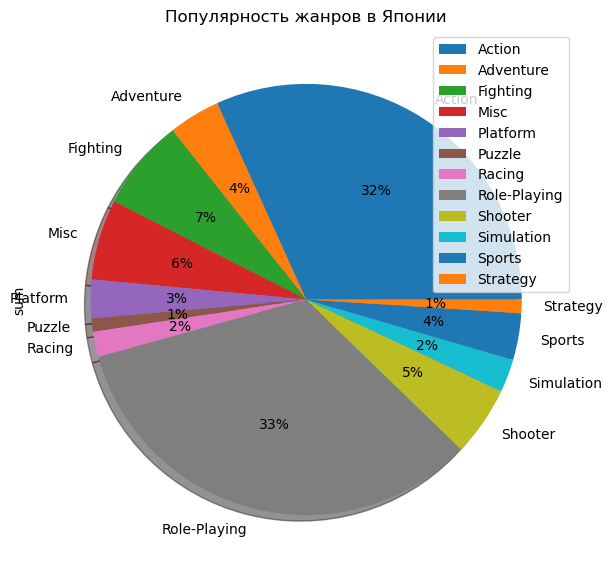

In [42]:
jp_sales_genre = df.pivot_table(index='genre', values='jp_sales')
jp_sales_genre['sum'] = df.groupby('genre')['jp_sales'].sum()
display(jp_sales_genre)

jp_sales_genre.plot(kind='pie', y='sum', autopct='%1.0f%%', title='Популярность жанров в Японии', 
                       figsize=(7,7), shadow=True)
plt.show()

Самыми популярными жанрами в Японии являются ролевые игры и экшн.

,other_sales,sum
genre,,
Action,0.036462,22.57
Adventure,0.009838,1.82
Fighting,0.045500,2.73
Misc,0.035664,4.03
Platform,0.047632,1.81
Puzzle,0.007857,0.11
Racing,0.041884,2.89
Role-Playing,0.039095,8.64
Shooter,0.168203,21.53


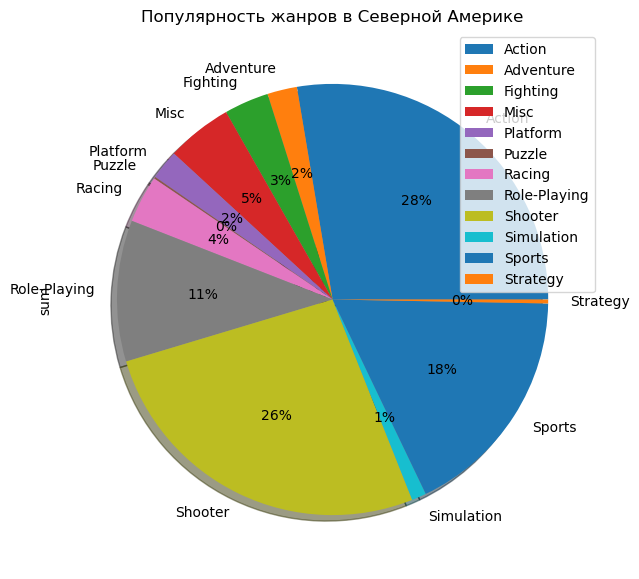

In [43]:
other_sales_genre = df.pivot_table(index='genre', values='other_sales')
other_sales_genre['sum'] = df.groupby('genre')['other_sales'].sum()
display(other_sales_genre)

other_sales_genre.plot(kind='pie', y='sum', autopct='%1.0f%%', title='Популярность жанров в Северной Америке', 
                       figsize=(7,7), shadow=True)
plt.show()

Самыми популярными жанрами других странах являются  экшн, шутеры, спортивные игры и ролевые игры.

In [44]:
df['rating'].unique()

array(['unknown', 'M', 'E', 'T', 'E10+'], dtype=object)

**Влияние рейтинга ESRB на продажи в отдельном регионе**

,na_sales,sum
rating,,
E,0.231689,50.74
E10+,0.179622,33.23
M,0.363849,96.42
T,0.143727,38.95
unknown,0.086409,64.72


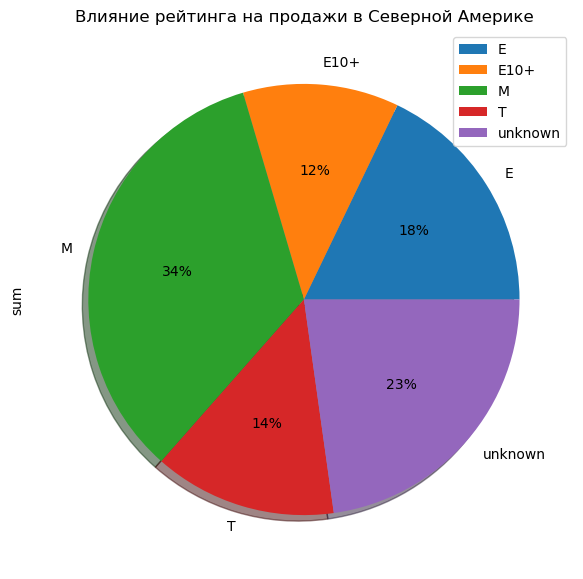

In [45]:
na_rating_genre = df.pivot_table(index='rating', values='na_sales')
na_rating_genre['sum'] = df.groupby('rating')['na_sales'].sum()
display(na_rating_genre)

na_rating_genre.plot(kind='pie', y='sum', autopct='%1.0f%%', title='Влияние рейтинга на продажи в Северной Америке', 
                       figsize=(7,7), shadow=True)
plt.show()

Больше всего продаж в Северной Америке имеют игры с рейтингом M.

,eu_sales,sum
rating,,
E,0.265114,58.06
E10+,0.141405,26.16
M,0.352604,93.44
T,0.125720,34.07
unknown,0.078705,58.95


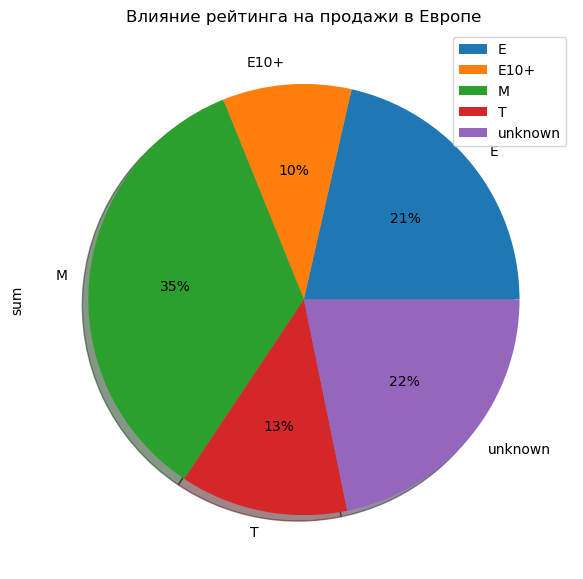

In [46]:
eu_rating_genre = df.pivot_table(index='rating', values='eu_sales')
eu_rating_genre['sum'] = df.groupby('rating')['eu_sales'].sum()
display(eu_rating_genre)

eu_rating_genre.plot(kind='pie', y='sum', autopct='%1.0f%%', title='Влияние рейтинга на продажи в Европе', 
                       figsize=(7,7), shadow=True)
plt.show()

Больше всего продаж в Европе имеют игры с рейтингом M.

,jp_sales,sum
rating,,
E,0.040822,8.94
E10+,0.024108,4.46
M,0.030226,8.01
T,0.054539,14.78
unknown,0.075968,56.90


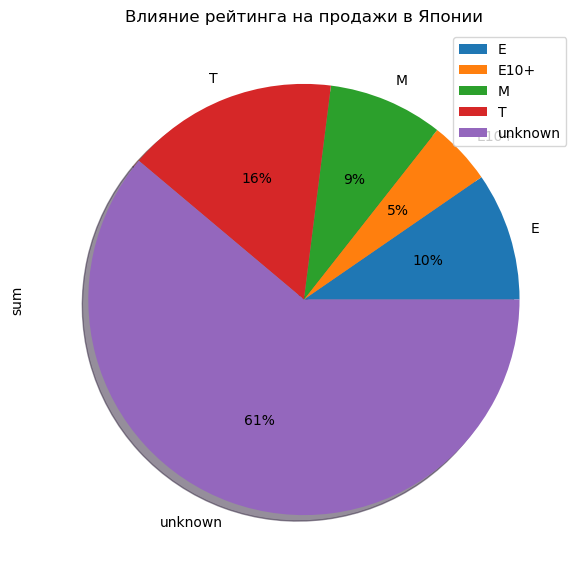

In [47]:
jp_rating_genre = df.pivot_table(index='rating', values='jp_sales')
jp_rating_genre['sum'] = df.groupby('rating')['jp_sales'].sum()
display(jp_rating_genre)

jp_rating_genre.plot(kind='pie', y='sum', autopct='%1.0f%%', title='Влияние рейтинга на продажи в Японии', 
                       figsize=(7,7), shadow=True)
plt.show()

Больше всего продаж в Японии имеют игры с рейтингом, имя которого не было выгружено из баз данных. Можем предположить, что название этой категории имело символы, которые не читаются базой данных, поэтому имя сохранено не было. 

,other_sales,sum
rating,,
E,0.070274,15.39
E10+,0.042324,7.83
M,0.108189,28.67
T,0.041808,11.33
unknown,0.024566,18.40


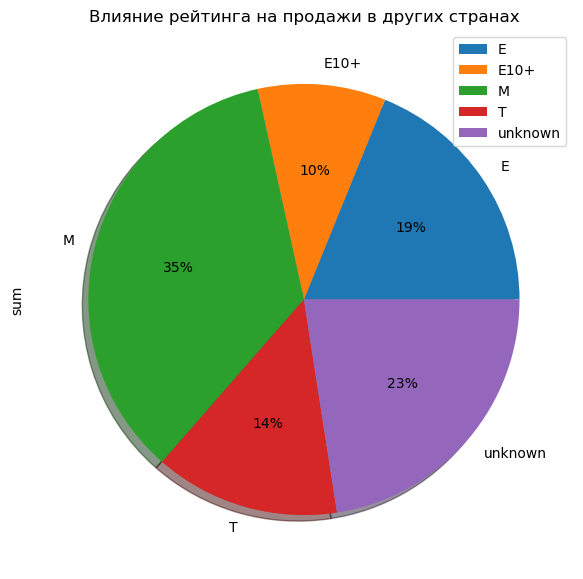

In [48]:
other_rating_genre = df.pivot_table(index='rating', values='other_sales')
other_rating_genre['sum'] = df.groupby('rating')['other_sales'].sum()
display(other_rating_genre)

other_rating_genre.plot(kind='pie', y='sum', autopct='%1.0f%%', title='Влияние рейтинга на продажи в других странах', 
                       figsize=(7,7), shadow=True)
plt.show()

Больше всего продаж в других странах имеют игры с рейтингом M. 

**5 самых популярных платформ - PS4, XOne, 3DS, PS3 и PSV.**

**5 самых популярных жанров - экшн, шутеры, спортивные игры, ролевые игры и игры из жанра "misc".**

**Игры с рейтингом M продаются чаще других во всех странах, участвующих в исследовании, кроме Японии - в ней преобладают игры с рейтингом T.**

## Гипотезы  <a class="anchor" id="5"></a>
### Установлю уровень статистической значимости - 5%

In [49]:
alpha = .05

#### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

```
H₀: средние пользовательские рейтинги платформ Xbox One и PC одинаковые
H₁: средние пользовательские рейтинги платформ Xbox One и PC разные
alpha = 0.05
```

In [50]:
df_rating_xone = df.query('platform == "XOne"')
df_rating_xone = df_rating_xone.query('user_score > 0')
df_rating_xone = df_rating_xone['user_score']

df_rating_pc = df.query('platform == "PC"')
df_rating_pc = df_rating_pc.query('user_score > 0')
df_rating_pc = df_rating_pc['user_score']

print(df_rating_xone.count())
print(df_rating_pc.count())

165
122


Так как выборки разного размера, применим `equal_var = False`.

In [51]:
results = st.ttest_ind(
    df_rating_xone, 
    df_rating_pc, equal_var = False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 0.11601398086668832
Не получилось отвергнуть нулевую гипотезу



Вероятность получить наблюдаемый или еще более далекий от предполагаемого результат равен 11%, что является недостаточным для того, чтобы отвергнуть нулевую теорию. 


**Гипотеза подтверждена: средние пользовательские рейтинги платформ Xbox One и PC одинаковые.**

#### Средние пользовательские рейтинги жанров Action и Sports разные

```
H₀: средние пользовательские рейтинги жанров Action и Sports одинаковые
H₁: средние пользовательские рейтинги жанров Action и Sports разные
alpha = 0.05
```

In [52]:
df_genre_action = df.query('genre == "Action"')
df_genre_action = df_genre_action.query('user_score > 0')
df_genre_action = df_genre_action['user_score']

df_genre_sports = df.query('genre == "Sports"')
df_genre_sports = df_genre_sports.query('user_score > 0')
df_genre_sports = df_genre_sports['user_score']

print(df_rating_xone.count())
print(df_rating_pc.count())

165
122


Так как выборки разного размера, применим `equal_var = False`.

In [53]:
results = st.ttest_ind(
    df_genre_action, 
    df_genre_sports, equal_var = False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 1.1825550382644557e-14
Отвергаем нулевую гипотезу



Вероятность получить наблюдаемый или еще более далекий от предполагаемого результат равен менее чем 1%, что является достаточным для того, чтобы отвергнуть нулевую теорию. 


**Гипотеза подтверждена: средние пользовательские рейтинги жанров Action и Sports разные.**

## Общий вывод  <a class="anchor" id="6"></a>
### Итоги проделанной работы.

**В ходе исследования я изучил данные, определил пропущенные значения, заполнил пропущенные значения там, где это возможно, пояснил, какие пропущенные значения я обнаружил, посчитал суммарные продажи во всех регионах.**

**Благодаря полученным данным мы можем сделать следующие выводы:**
- самое большое количество игр было выпущено в 2008-2009 года - их свыше 2800
- самой крупной платформой за всё время является PS2
- на момент 2016 года пятью самыми перспективными являются PS4, XOne, 3DS, PC и WiiU
- корреляция продаж относительно оценок в среднем равна 0.33
- самым прибыльным жанром является Shooter
- самым малочисленным жанром с точки зрения продаж является Adventure

**Был составлен и визуализирован портрет пользователя каждого региона. Сделаны следующие выводы:**
- 5 самых популярных платформ среди трёх выбранных стран - PS4, XOne, 3DS, PS3 и PSV
- 5 самых популярных жанров - экшн, шутеры, спортивные игры, ролевые игры и игры из жанра "misc"
- игры с рейтингом M продаются чаще других во всех странах, кроме Японии - в ней преобладают игры с рейтингом, название которого выгружено не было

**Проверены гипотезы:**
- средние пользовательские рейтинги платформ Xbox One и PC одинаковые
- средние пользовательские рейтинги жанров Action и Sports разные